In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pulser
from pulser_simulation import QutipEmulator

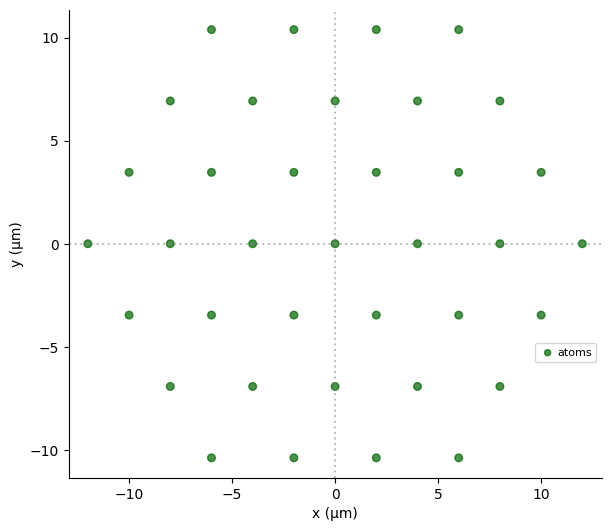

In [2]:
layers = 3
reg = pulser.Register.hexagon(layers, prefix="q")
reg.draw(with_labels=False)

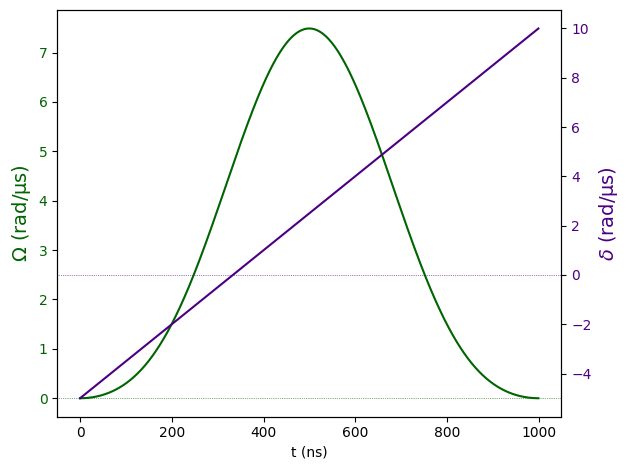

In [3]:
duration = 1000  # Typical: ~1 µsec
pulse = pulser.Pulse(
    amplitude=pulser.BlackmanWaveform(duration, np.pi),
    detuning=pulser.RampWaveform(duration, -5.0, 10.0),
    phase=0,
)
pulse.draw()

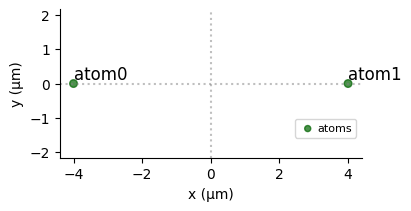

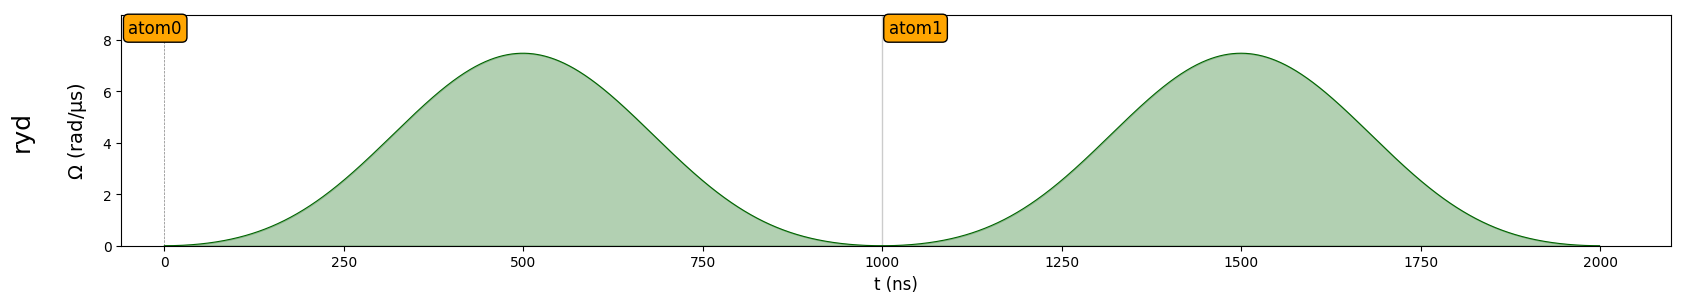

In [4]:
reg = pulser.Register.rectangle(1, 2, spacing=8, prefix="atom")
reg.draw()

pi_pulse = pulser.Pulse.ConstantDetuning(
    pulser.BlackmanWaveform(duration, np.pi), 0.0, 0.0
)

seq = pulser.Sequence(reg, pulser.DigitalAnalogDevice)

seq.declare_channel("ryd", "rydberg_local", "atom0")

seq.add(pi_pulse, "ryd")
seq.target("atom1", "ryd")
seq.add(pi_pulse, "ryd")

seq.draw()